<a href="https://colab.research.google.com/github/Simon-creator-jara/Prueba/blob/main/Prueba_Nequi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

Comenzamos por importar las librerías necesarias para el proceso

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4d3255d85ee66975526656fa3ef6c069953b4c58db7ee9e92a02fbe5f6286d67
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd
from random import seed
from random import random
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [ ]:
path="/content/drive/MyDrive/PruebaNequi/sample_data_0006_part_00.parquet"

# Carga de datos

Cargamos los datos almacenados en Drive

In [ ]:
data=pd.read_parquet(path, engine='pyarrow')
data

,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
0,075d178871d8d48502bf1f54887e52fe,aa8dacff663072244d0a8ab6bbe36b93,824b2af470cbe6a65b15650e03b740fc,2021-09-12 18:32:03,648e257c9d74909a1f61c54b93a9e1b3,ba42d192a145583ba8e7bf04875f837f,178.33365037,CREDITO
1,075d178871d8d48502bf1f54887e52fe,a53bb81bd0bba2ae2535bda7ea5a550c,2d8d34be7509a6b1262336d036fdb324,2021-09-12 18:31:58,c0b62f9046c83ea5543ea46a497a4d6e,5cfff960ea6d732c1ba3e63d24f3be52,35.66673007,CREDITO
2,075d178871d8d48502bf1f54887e52fe,79f893ea65c06fe2933f3847c88c272f,5eeb18254850b21af0a6bb2697913cd3,2021-09-12 18:31:56,872d10143fc0ac7d5de467806f6bef81,c97e63a92c82c7217b333635d75928ed,142.66692029,CREDITO
3,075d178871d8d48502bf1f54887e52fe,ce577223699dbdc119df2ab8a35457fe,5221a599856c0a0588ed9ffd150edd3b,2021-09-12 18:31:10,2e35cfe7860a480a93e1c83e99843579,fc09bdd00f283222d65eaff4d00a6594,8.32223701,CREDITO
4,075d178871d8d48502bf1f54887e52fe,0ce7ab2950e7a788a608f881aec0f8f0,971e55ef12d80ec070ea4f6750c8b892,2021-09-12 18:31:07,995bc89e4c4e00334f1f90c4a55f4729,213527e8ba94fcaf2f9378969f9f6abc,32.10005706,CREDITO
...,...,...,...,...,...,...,...,...
10758413,838a8fa992a4aa2fb5a0cf8b15b63755,a5aa72fcd7c5112edc34cb9a958a0527,491f82ee9080fb1bd9136582af5d05e0,2021-11-28 15:04:13,123194d19f7c115e27714410dbb5a258,42e1e57b83adc6f96da060e3532bddb4,582.55659121,CREDITO
10758414,838a8fa992a4aa2fb5a0cf8b15b63755,5c61b1bf4b8d977c550635f9fedb70c2,cda5c7bd709e27ff91387b92fb4b00d1,2021-11-30 14:18:23,e6df02c2b8ff18dedd8c363712bae8a2,b63e177e5fc48f25b24e5e2866aa99c0,11.88891002,CREDITO
10758415,838a8fa992a4aa2fb5a0cf8b15b63755,7a501edf36586ee7ec4d7fb67e905fdc,c8c13e18a816fed4a3b31727543da42d,2021-11-30 14:57:53,c7d51806a26ff2e94bab939e720b67e6,2693ec4b35cf20dc7db973022d84c0a5,285.33384059,CREDITO
10758416,838a8fa992a4aa2fb5a0cf8b15b63755,52974b152d981985b17cdbdf29603e86,e966a70a113b62d9450f3367b66cc2dc,2021-11-29 12:38:25,3810f9c0156ed6c41ecc7a5dc73019ba,9f6a319138dbc5bd2bbc47f82723f30c,11.88891002,CREDITO


# Exploración Datos

Comenzamos la exploración de los datos, primero queremos conocer la tipología de los datos, nos damos cuenta que la mayoría son tipo string solo transaction_date es de tipo datetime, por lo cual procedemos a hacer un describe() de los datos para ver qué más podemos obtener

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10758418 entries, 0 to 10758417
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   merchant_id         object        
 1   _id                 object        
 2   subsidiary          object        
 3   transaction_date    datetime64[ns]
 4   account_number      object        
 5   user_id             object        
 6   transaction_amount  object        
 7   transaction_type    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 656.6+ MB


Al realizar un describe() de los datos no encontramos información muy relevante, simplemente se puede rescatar que todas las columnas tienen los datos integros. Además, de conocer los datos que más se repiten, sin embargo, el dataset crudo no dan mucha información, así que debemos de crear un dataset que realmente nos ayude y nos entregue información relevante 

In [ ]:
data.describe()

<ipython-input-6-2bb0b18689d4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
count,10758418,10758418,10758418,10758418,10758418,10758418,10758418,10758418
unique,3,10758411,16052,7615997,1954040,1948844,18554,2
top,817d18cd3c31e40e9bff0566baae7758,b93a2bb461682a71f593049250e68a4e,f54e0b6b32831a6307361ed959903e76,2021-06-08 11:47:16,3094e023b7a40245397e116bddbe45e8,5e674596af22a66e826bf15b2a363cce,59.44455012,DEBITO
freq,7267100,2,357448,15,1200,1900,1154454,8591289
first,NaN,NaN,NaN,2021-01-01 00:01:13,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-11-30 23:59:49,NaN,NaN,NaN,NaN


In [ ]:
data.describe(include='object')

,merchant_id,_id,subsidiary,account_number,user_id,transaction_amount,transaction_type
count,10758418,10758418,10758418,10758418,10758418,10758418,10758418
unique,3,10758411,16052,1954040,1948844,18554,2
top,817d18cd3c31e40e9bff0566baae7758,b93a2bb461682a71f593049250e68a4e,f54e0b6b32831a6307361ed959903e76,3094e023b7a40245397e116bddbe45e8,5e674596af22a66e826bf15b2a363cce,59.44455012,DEBITO
freq,7267100,2,357448,1200,1900,1154454,8591289


Vemos algo interesante y lógico y es que noviembre es el mes con mayor cantidad de transacciones, sin Embargo no podemos concluir mucho más del histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22d06c6d90>]],
      dtype=object)

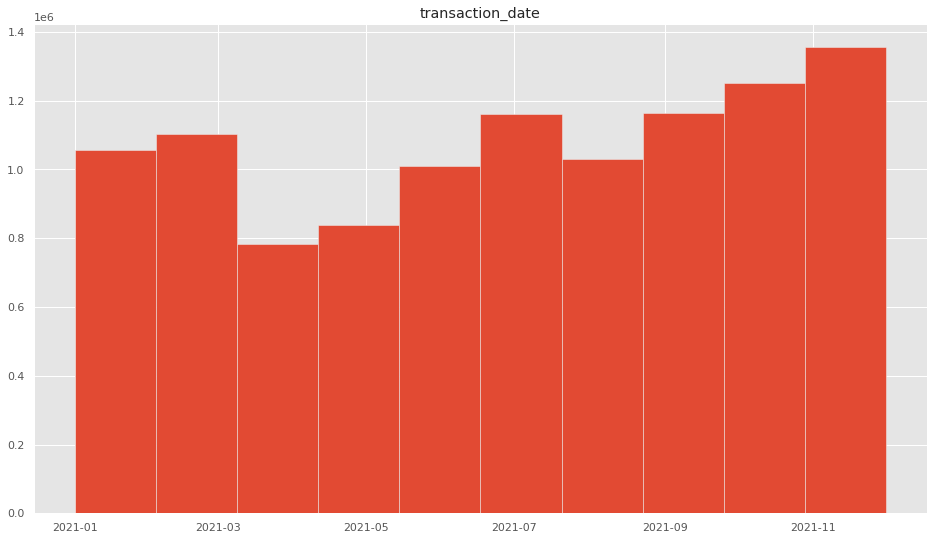

In [ ]:
data.hist()

# Creación de nuevo dataset (data mining)

**Decidimos evaluar las transacciones de solo un día debido a la gran cantidad de información, además de que en la descripción del problema nos dicen que las transacciones objetivas se hacen dentro de un horario de 24 horas. Además, se va a crear una nueva columna llamada segundos, la cual contiene la hora de la transacción pero en segundos**

Decidimos calcular una nueva columna llamada segundos, en la cual vamos a pasar la hora en la que se hizo la transacción a segundos.

In [ ]:
data['segundos']=data['transaction_date'].apply(lambda x: (timedelta(seconds=datetime.time(x).second,hours=datetime.time(x).hour,minutes=datetime.time(x).minute)).seconds)

Luego de esto hacemos la revisión para los datos de un día en específico

In [ ]:
dia_inicio = pd.Timestamp('2021-08-01T00')
dia_fin = pd.Timestamp('2021-08-02T00')

Filtramos el dataset por el día que se escoge, cabe resaltar que se debe escoger un día completo para hacer el análisis y así poder detallar bien toda la trazabilidad de las transacciones.

In [ ]:
filtered_df =data.loc[data["transaction_date"].between(dia_inicio, dia_fin)]

Se orden el dataset por la fecha y hora de transacción para saber cuál fue la primera y última transacción en el día. Y lograr que las transacciones queden en orden para llevar el orden cronolófico de las mismas.

In [ ]:
filtered_df_sorted=filtered_df.sort_values('transaction_date')

In [ ]:
filtered_df_sorted

,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type,segundos
3395259,817d18cd3c31e40e9bff0566baae7758,6316b36375fbacaf5e885dcbfc1c5c47,62abeb40d42104763d8bd87c8133906b,2021-08-01 00:00:04,e6849b60090cbbd8d494b32eb45a42de,a78287b7b038d590d0f31f68ab7e41b2,47.55564009,DEBITO,4
4870692,817d18cd3c31e40e9bff0566baae7758,053d4645ef5e240d3314b73b19e21b55,b889367a5e296f71416a34b9746b0e14,2021-08-01 00:02:16,6c33d54e7932b9b5162f320b6ef156e9,e9ceea1b5cc9c6eece3dc5f651f5481d,59.44455012,DEBITO,136
3950867,817d18cd3c31e40e9bff0566baae7758,b785a0978a7eac3f376b5c6527a41881,d836bdcec2f355fec82d1f7490f7341f,2021-08-01 00:02:41,d921877b67a5800e427574185b3550d9,89aa4e325297aebf6b183d4af581b626,237.77820049,DEBITO,161
6831889,817d18cd3c31e40e9bff0566baae7758,435aabf7b488ba3026cc6abf8be74706,3362af3a2171e85b86015f46bb4bc986,2021-08-01 00:03:33,a18ba4a2addaf655d4746df475c6ffd5,d179a2ef3979f144446d66e985e7f600,23.77782004,DEBITO,213
4128737,817d18cd3c31e40e9bff0566baae7758,a514dcfeee9ed140f2bf67e0ec1811cb,385110367dca4a60adee7995feeb76f0,2021-08-01 00:04:08,5693cd0b02ac278ff1b419ec6f8c88b5,5eba7baa36c12d82539458790d9e19da,47.55564009,DEBITO,248
...,...,...,...,...,...,...,...,...,...
3983049,817d18cd3c31e40e9bff0566baae7758,44a3dfa8d442abd83b00e728517794d2,1f98299f8e0dc549edcf905682548cf9,2021-08-01 23:58:07,c86c41811e679d4a264c6183db2e4582,9d541b639a8bad8f9ae9018f61a208cb,59.44455012,CREDITO,86287
6526942,817d18cd3c31e40e9bff0566baae7758,4a822fb65ef05e952cfc18465e82ebf9,c9b3893cc3d49473f4038a34dd963608,2021-08-01 23:58:31,283f48cf91419c07ece6042a4a7db28f,f71429d03025640da0dcc597d5ac9cb5,59.44455012,DEBITO,86311
2371139,817d18cd3c31e40e9bff0566baae7758,2fa394de0c716c96622b645a8c75bdc9,7bd5c5b9e8872f8641bf544aa0a55baf,2021-08-01 23:58:59,309c6f92d0042ee8e6044bf697a2137c,d6060dc111fcaa1460761811f68090fb,11.88891002,DEBITO,86339
4713599,817d18cd3c31e40e9bff0566baae7758,483f3e1fefcf361040c355fee22bc749,32c7b7843a93ffea43786868715e38a6,2021-08-01 23:59:24,0eccee583004b8796d82f70c13d1c827,9ea429bb9e11bed6bd66fdde2121bbe5,23.77782004,DEBITO,86364


Ahora vamos a buscar el número de veces que hay transacciones a una misma cuneta (Se halla el numero de transacciones x número de cuenta). Se hace la verificación de aquellas cuentas que se repiten, es decir, hallamos la frecuencia absoluta del número de cuenta. Evidenciamos que la mayoría de cuentas tienen entre 1 y 2 movimientos y que hay pocas con movimientos mayores a 3

In [ ]:
#Tabla de frecuencias
frec_numero_cuenta = pd.crosstab(index=filtered_df_sorted['account_number'],columns='Frecuencia')
frec_numero_cuenta

col_0,Frecuencia
account_number,
0000710d7dcd6ca62a9f3ec8a9a19c47,1
000553c2d0f732c7cbc50e299092ff37,1
00072bb1ceca34505a730f81c2c6c7aa,1
00090855b6ff6117e18df2bf04a2644f,2
000ce1c52f191de9049791046d1b5433,1
...,...
fff30d6895feb7e4f7d72a1a95b3eb78,1
fff33150e75c33fc8ebb17ec08b21c9d,1
fff39cf8650418b1c1b7544fb806d4b3,2


Ahora lo que haremos es cambiar el tipo de dato de la columna transaction_amount a tipo float, dado que anteriormente aparecía como string

In [ ]:
filtered_df_sorted.transaction_amount=pd.to_numeric(filtered_df_sorted.transaction_amount, downcast='float')

Ahora como dice la descripción del problema las cuentas que son sospechosas de robo son aquellas que sus transacciones se hicieron en una ventana de 24 horas y tienen como origen o dstino la misma cuenta o cliente, por lo cual se decidió agrupar los datos por número de cuenta y id del usuario y tener como columnas el conteo de transacciones por cuenta, suma total de las transacciones y la lista de momentos en los que se hicieron las transacciones 

In [ ]:
x=filtered_df_sorted.groupby(by=['account_number','user_id']).agg({'account_number':'count', 'transaction_amount': 'sum','segundos':lambda x:sorted(x.tolist())})

In [ ]:
x.rename(columns = {'account_number':'account_number_count','transaction_amount':'transaction_amount_sum'}, inplace = True)

In [ ]:
x.reset_index(inplace=True)

Ahora hacemos una función en la cual restamos la última hora en la que se hizo la transacción con la primera y tratar de tener la ventana de tiempo en la cual se hicieron las transacciones.

In [ ]:
def transacciones_minuto(lista):
  lista=sorted(lista, reverse=True)
  
  return lista[0]-lista[-1]
      

In [ ]:
x['transaction_less_minute']=x['segundos'].apply(transacciones_minuto)

Vamos a verificar este nuevo dataset y nos damos cuenta que hay gran cantidad de datos en los valores bajos del conteo de transacciones por número de cuenta. En valores como 1 o 2 se concentran gran cantidad de datos por lo cual estos datos no nos entregan gran información, así que vamos a suponer que el número de transacciones 1 o 2 por cuentas no representan transacciones sospechosas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a92df2d90>,
      dtype=object)

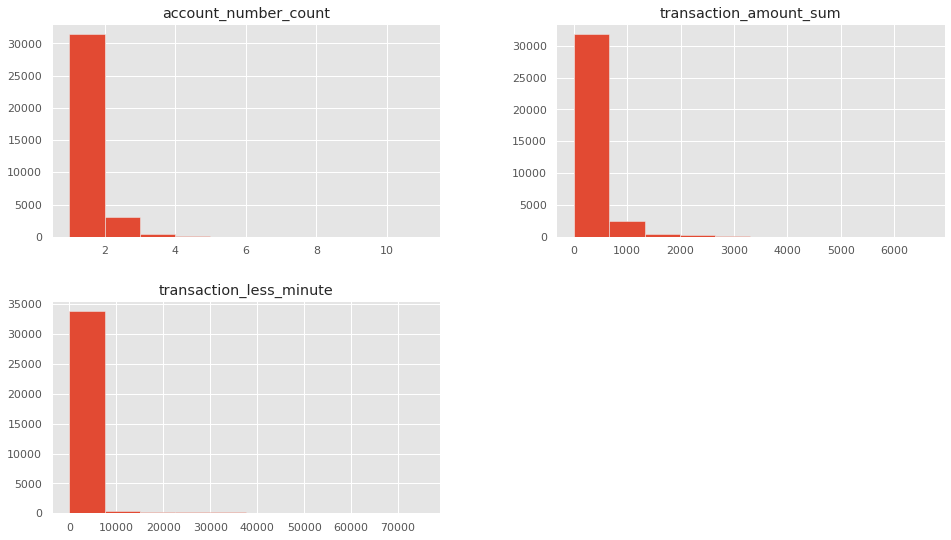

In [ ]:
x.hist()

In [ ]:
x.describe()

,account_number_count,transaction_amount_sum,transaction_less_minute
count,35100.000000,35100.000000,35100.000000
mean,1.127521,275.279572,824.127436
std,0.416996,376.860199,4697.138626
min,1.000000,5.944455,0.000000
25%,1.000000,59.444550,0.000000
50%,1.000000,130.778015,0.000000
75%,1.000000,356.667297,0.000000
max,11.000000,6610.233887,75139.000000


Los gráficos de violín rectifican lo que pensamos, para los 1 y 2 en valores de conteo por número de cuenta (eje x), la suma del monto de las transacciones se concentran en valores bajos, mientras que en demás valores la distribución es más equitativa, es decir, no hay un punto en el cual se concentren los datos de las transacciones.

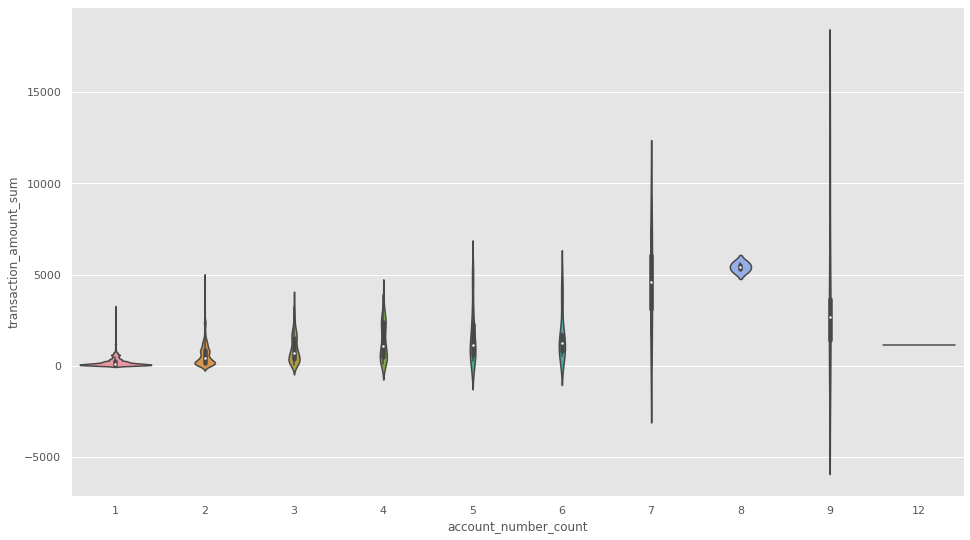

In [ ]:
sns.violinplot(data=x, x="account_number_count", y="transaction_amount_sum")

Por otro lado, se validó que las transacciones se realizan en un tiempo muy corto y pocas transacciones se hacen distribuidas en el tiempo, por esto sale otra hipótesis y es que las transacciones sospechosas se deben hacer en diferencias de tiempo cortas, no son tan distribuidas en el día 

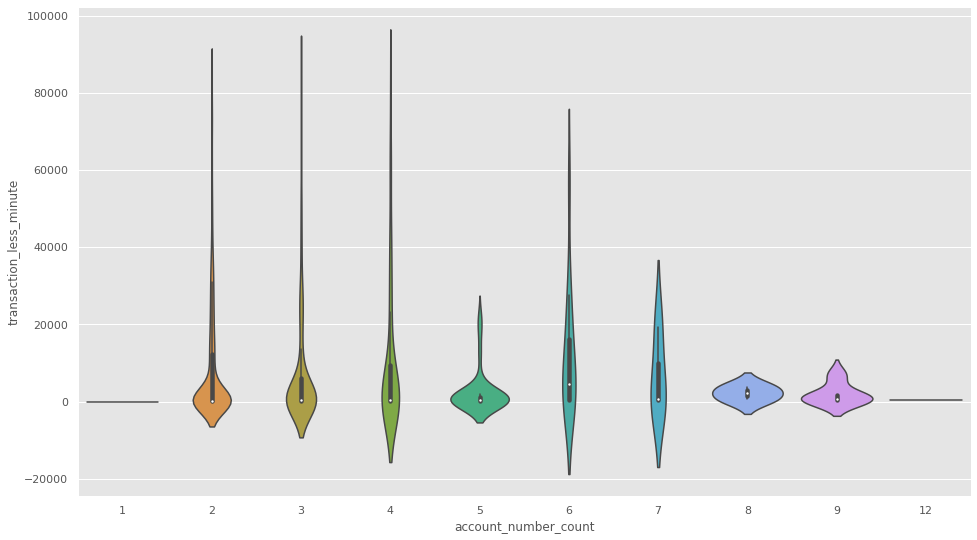

In [ ]:
sns.violinplot(data=x, x="account_number_count", y="transaction_less_minute")

# Modelo

**Ahora este problema lo vamos a modelar con Fuzzy sets**

Como la distribución de los datos es un poco complicada y no se ajusta muy bien, se va a modelar el problema con lógica aproximada, así que comenzamos con las hipótesis que ya describimos las cuentas entre 1 o 2 transacciones no son sospechosas, por otro lado cuentas con trasacciones en un tiempo muy corto tienen mayor probabilidad de ser sospechosas

In [ ]:
maximo_cantidad_2=max(x[x['account_number_count']<=2]['transaction_amount_sum'])
mean_time_transaction=x.transaction_less_minute.mean()
max_time_transaction=max(x.transaction_less_minute)

Se va a fuzzificar la variable account_number_count en tres valores un riesgo bajo 1-2, riesgo moderado 3 -6 y un riesgo crítico 7 - en adelante. 

Para la fuzzificación de la variable transaction_amount_sum se tendrán dos valores, suma baja la cual irá desde 0 hasta el máximo valor de aquellas cuentas con número de transacciones menores o iguales a 2 y el rango de suma alta irá desde la mitad del valor anteriormente descrito hasta el máximo valor acumulado de todas las transacciones del día. 

Finalmente, para la fuzzificación de la variable transaction_less_minute se tendrán dos valores acumulado bajo que va desde ceros hasta el promedio del tiempo que hay entre transacciones y un acumulado alto que va hasta el máximo de la diferencia de tiempo que hay entre transacciones, es decir, es la diferencia más alta.

In [ ]:
#Fuzzificación de la variable account_number_count

# Valores 1 - 2 : Bajo Riesgo
#Valores 3 - 6 : Riesgo moderado
#Valores 7 - en adelante : Riesgo crítico

mf_qual = np.arange(0, max(x.account_number_count)+10,1 )
r_bajo = fuzz.trapmf(mf_qual, [0, 0.5, 1,3])
r_medio = fuzz.trapmf(mf_qual, [2, 4,5, 7])
r_critico = fuzz.trapmf(mf_qual, [6, 9, max(x.account_number_count)+10,max(x.account_number_count)+10])

#Fuzzificación de la variable transaction_amount_sum
#valores 0 - max(2 transacciones): Suma Baja
#valores max(2 transacciones)-2 - max(suma transacciones)+3: Suma alta

mf_sum = np.arange(0, max(x.transaction_amount_sum)+3,1 )
s_baja = fuzz.trimf(mf_sum, [0, maximo_cantidad_2/2,maximo_cantidad_2])
s_alta = fuzz.trapmf(mf_sum, [maximo_cantidad_2/2, max(x.transaction_amount_sum)/2,max(x.transaction_amount_sum)+3, max(x.transaction_amount_sum)+3])

#Fuzzificación de la variable transaction_less_minute
#valores 0 - mean.transaction_less_minute: Tiempo acumulado de transacciones bajo
#valores mean.transaction_less_minute/2 - max(transaction_less_minute)+8: Tiempo acumulado de transacciones bajo alto

mf_acum = np.arange(0, max(x.transaction_less_minute)+8,1 )
a_baja = fuzz.trimf(mf_acum, [0, mean_time_transaction/2,mean_time_transaction])
a_alta = fuzz.trimf(mf_acum, [mean_time_transaction/2, max_time_transaction/2,max_time_transaction+8])


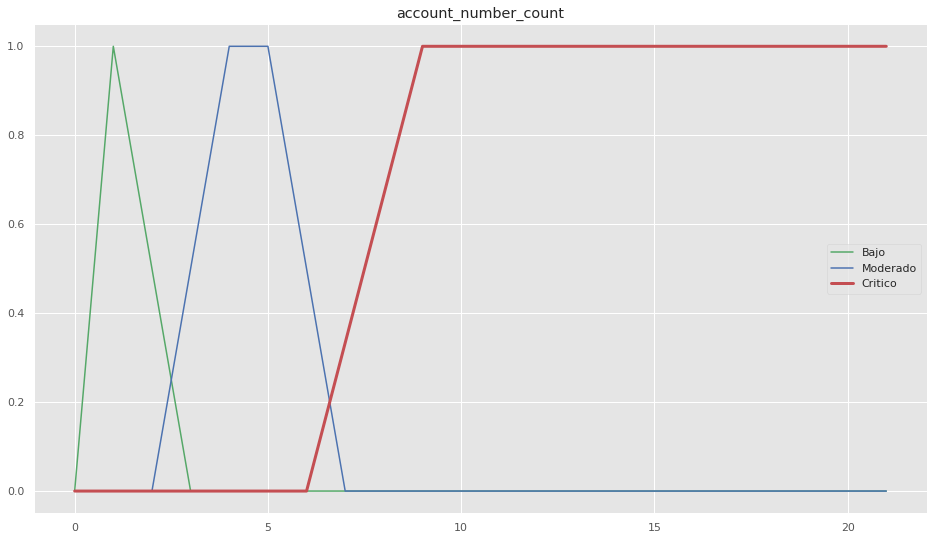

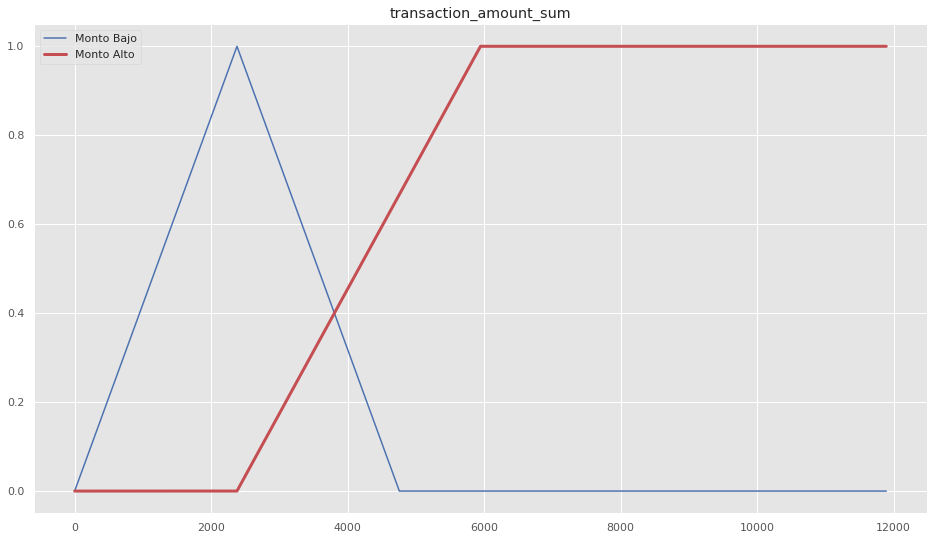

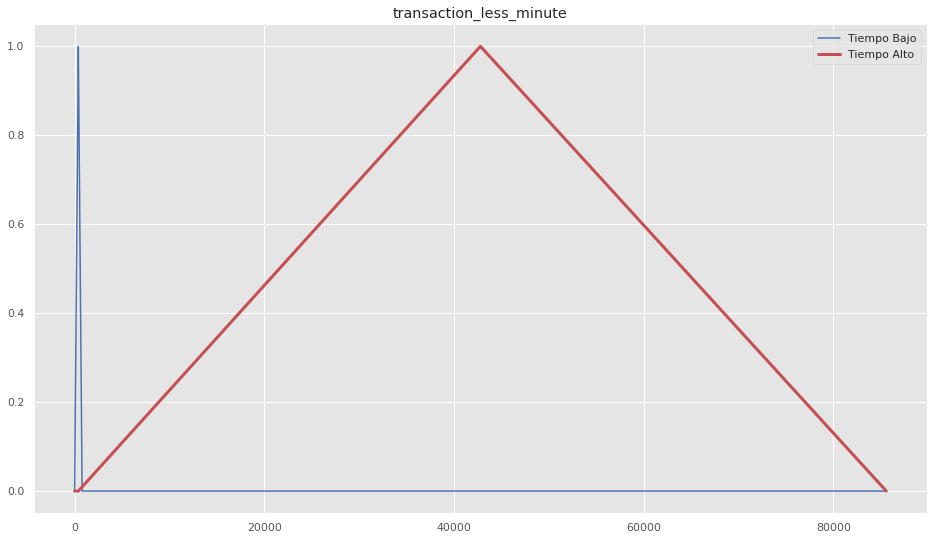

In [ ]:
# account_number_count
plt.plot(mf_qual, r_bajo, 'g', linewidth=1.5, label='Bajo')
plt.plot(mf_qual, r_medio, 'b', linewidth=1.5, label='Moderado')
plt.plot(mf_qual, r_critico, 'r', linewidth=3, label='Critico')
plt.title('account_number_count')
plt.legend()
plt.show()

#transaction_amount_sum
plt.plot(mf_sum, s_baja, 'b', linewidth=1.5, label='Monto Bajo')
plt.plot(mf_sum, s_alta, 'r', linewidth=3, label='Monto Alto')
plt.title('transaction_amount_sum')
plt.legend()
plt.show()

#transaction_less_minute
plt.plot(mf_acum, a_baja, 'b', linewidth=1.5, label='Tiempo Bajo')
plt.plot(mf_acum, a_alta, 'r', linewidth=3, label='Tiempo Alto')
plt.title('transaction_less_minute')
plt.legend()
plt.show()

Se verifica el nivel de pertenencia a cada uno de los sets para luego evaluarlos en las reglas.

In [ ]:
#nivel de membresía account_number_count
def Fuzzaccount_number_count(qualVal):
  fzz_qual = np.zeros(3)

  fzz_qual[0] = fuzz.interp_membership(mf_qual, r_bajo, qualVal)
  fzz_qual[1] = fuzz.interp_membership(mf_qual, r_medio, qualVal)
  fzz_qual[2] = fuzz.interp_membership(mf_qual, r_critico, qualVal)

  return fzz_qual

#nivel de membresía transaction_amount_sum
def Fuzztransaction_amount_sum(svcVal):
  fzz_svc = np.zeros(2)

  fzz_svc[0] = fuzz.interp_membership(mf_sum, s_baja, svcVal)
  fzz_svc[1] = fuzz.interp_membership(mf_sum, s_alta, svcVal)


  return fzz_svc

#nivel de membresía transaction_less_minute
def Fuzztransaction_less_minute(timeVal):
  fzz_time = np.zeros(2)

  fzz_time[0] = fuzz.interp_membership(mf_acum, a_baja, timeVal)
  fzz_time[1] = fuzz.interp_membership(mf_acum, a_alta, timeVal)


  return fzz_time

Ahora haremos tendremos dos reglas para determinar si es una cuenta con sospecha o sin sospecha. Vamos a definir una primera regla, la cual tendrá varias opciones y serán las condiciones para determinar que una transacción no es sospechosa, esta primera regla tiene las siguientes opciones (No Sospechosos): 
- Si el número de transacciones de un número de cuenta es bajo y la suma de los movimientos es baja.
- La cantidad de transacciones de un número de cuentas es bajo, la suma de los movimientos es baja y se realizan en un período de tiempo corto. 
- La cantidad de transacciones de un número de cuentas es bajo, la suma de los movimientos es baja y se realizan en un período de tiempo alto. 
- La cantidad de transacciones de un número de cuentas es medio, la suma de los movimientos es baja y se realizan en un período de tiempo alto. 

La segunda regla tiene las siguientes opciones (Sospechosos):
-  La cantidad de transacciones de un número de cuentas es medio, la suma de los movimientos es baja y se realizan en un período de tiempo bajo.
- La cantidad de transacciones de un número de cuentas es alto, la suma de los movimientos es alto y se realizan en un período de tiempo bajo.
- La cantidad de transacciones de un número de cuentas es medio, la suma de los movimientos es alto.
- La cantidad de transacciones de un número de cuentas es alto y se realizan en un período de tiempo bajo.
 

In [ ]:
def evalRules(fuzzedQal, fuzzedSvc,fuzzedtime):
  outVarS = np.zeros(2)
  outVarS[0] = max(outVarS[0], min(fuzzedQal[0], fuzzedSvc[0])) #regla 1 si la cantida de transacciones en numero de cuenta bajo y suma de montos baja
  outVarS[0] = max(outVarS[0], min(fuzzedQal[0], fuzzedSvc[0],fuzzedtime[0])) #regla 1 si la cantida de transacciones en numero de cuenta bajo y suma de montos baja
  outVarS[0] = max(outVarS[0], min(fuzzedQal[0], fuzzedSvc[0],fuzzedtime[1]))
  outVarS[0] = max(outVarS[0], min(fuzzedQal[1], fuzzedSvc[0],fuzzedtime[1])) #regla 1 si la cantida de transacciones en numero de cuenta medio y suma de montos baja y el tiempo alto
  outVarS[1] = max(outVarS[1], min(fuzzedQal[1], fuzzedSvc[0],fuzzedtime[0])) #regla 2 si la cantida de transacciones en numero de cuenta medio y suma de montos baja y el tiempo bajo
  outVarS[1] = max(outVarS[1], min(fuzzedQal[2], fuzzedSvc[1],fuzzedtime[0])) # regla 2 si la cantida de transacciones en numero de cuenta es alto y suma de montos alto y en corto tiempo
  outVarS[1] = max(outVarS[1], min(fuzzedQal[1], fuzzedSvc[1])) # regla 2 si la cantida de transacciones en numero de cuenta es medio y suma de montos alto 
  outVarS[1] = max(outVarS[1], min(fuzzedQal[2], fuzzedtime[0])) # regla 2 si la cantida de transacciones en numero de cuenta es alto y en un tiempo corto
  return outVarS

In [ ]:
def execFzzedRules(account_count,transaction_sum,time_count):
  fzzedaccount_number_count = Fuzzaccount_number_count(account_count)

  fzzedtransaction_amount_sum = Fuzztransaction_amount_sum(transaction_sum)

  fzzedtime_count= Fuzztransaction_less_minute(time_count)

  EvaledRs = evalRules(fzzedaccount_number_count,fzzedtransaction_amount_sum,fzzedtime_count)
  return EvaledRs

Ahora vamos a adicionar el label de Sospechoso o No Sospechoso, según la probabilidad de las reglas de evaluación.

In [ ]:
lista=[]
for i in range(len(x.account_number_count)):
  w=execFzzedRules(x.account_number_count[i],x.transaction_amount_sum[i],x.transaction_less_minute[i])
  if w[1]>w[0]:
    lista.append('Sospechoso')
  else:
    lista.append('No Sospechoso')

In [ ]:
x['Label']=pd.DataFrame(lista,index=x.index)

In [ ]:
x

,account_number,user_id,account_number_count,transaction_amount_sum,segundos,transaction_less_minute,Label
0,000145c89e3faae99d09731414395e5a,da671670b590f68a715e362f14033945,1,47.555641,[44609],0,No Sospechoso
1,00072bb1ceca34505a730f81c2c6c7aa,c10b5e8d123fc79993addae2ba3f2d1a,1,11.888910,[41938],0,No Sospechoso
2,000799213e728c0f2a4fb029ded8bcef,904f25a99fe329df10d5e3d5df082a2f,1,17.833364,[64459],0,No Sospechoso
3,00079a9b01baf50842eaf6a251ff2348,574b7d3f92373225b9039d1fd2d4ef27,1,154.555832,[58876],0,No Sospechoso
4,00090855b6ff6117e18df2bf04a2644f,7d0278db59b95ad1727cc59b4b8032e2,2,2377.781982,"[42564, 42619]",55,No Sospechoso
...,...,...,...,...,...,...,...
19898,fff071f3b18d3a3652522501a4358a43,ff11505121eae7b20b49da5ccd7d833b,1,130.778015,[52285],0,No Sospechoso
19899,fff09464c863bf5ca65da18c37086e19,be9d5287564b8b0157dd524a711cb4f3,1,237.778198,[35834],0,No Sospechoso
19900,fff1f8b905525353f95738758525a263,118a8c621cf53622de01481a6841763f,1,214.000381,[64619],0,No Sospechoso
19901,fff81db40fd639f610c4500bd139bd0f,25990abde842e908210d73d9291ce890,1,416.111847,[45382],0,No Sospechoso


Como resultado vemos que la mayoría de los mvtos son No Sospechosos debido a que gran número corresponden a mvtos de 1 o 2 transacciones.

In [ ]:
frec_label = pd.crosstab(index=x['Label'],columns='Frecuencia')
frec_label['Frecuencia relativa']=frec_label['Frecuencia']/sum(frec_label['Frecuencia'])
frec_label

col_0,Frecuencia,Frecuencia relativa
Label,,
No Sospechoso,19651,0.987339
Sospechoso,252,0.012661


<BarContainer object of 2 artists>

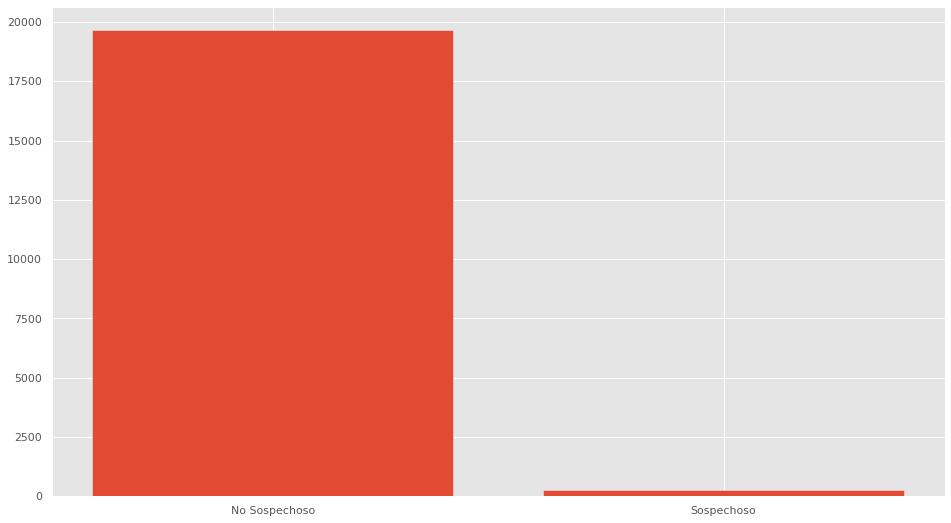

In [ ]:
plt.bar(frec_label.index,frec_label['Frecuencia'])

# Aclaraciones 

- Para este modelo cabe resaltar que la ingestión de los datos se debe de realizar diariamente y correr la ETL del proceso en las noches a la media noche, esto con el objetivo de tener todas las transacciones que se hicieron en el día.
- Para este problema en específico propondría tener dos bases de datos, una base de datos transaccional la cual se actualice inmediatamente se realice una transacción y una base de datos analítica que se actualice asincronocamente y revisarla una hora proxima a media noche para tener toda la información lista y poder ejecutar el modelo. 


# Arquitectura

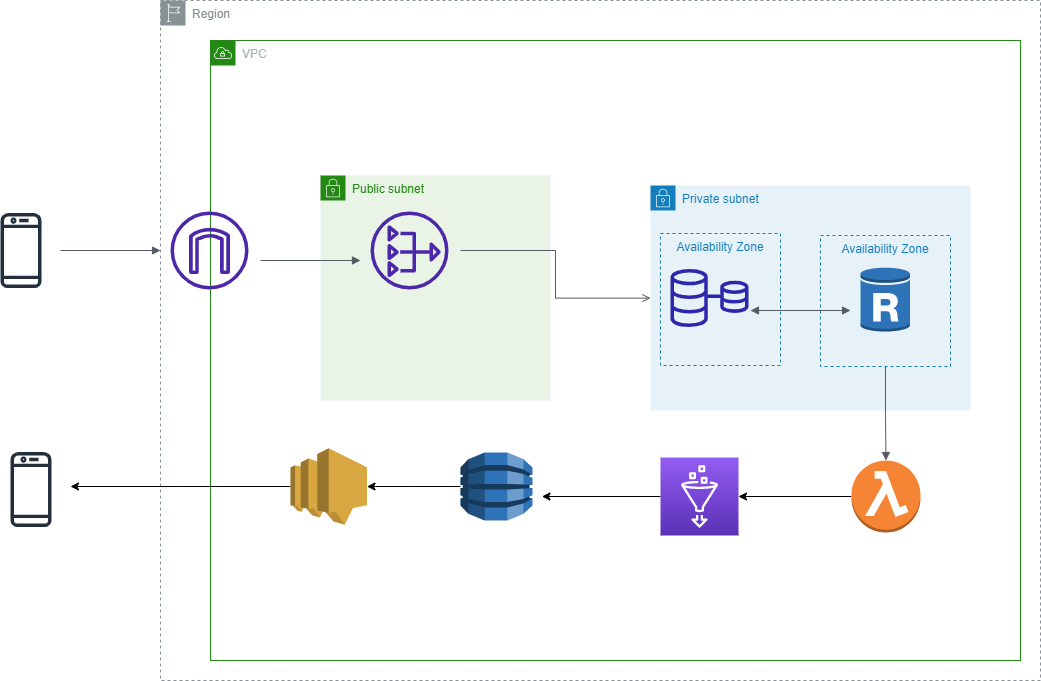

Como ya explicamos anteriormente el modelo que se propusó no es un modelo tradicional que necesite una dockerización para poder disponer de una imagen con todos los paquetes, sino que se utiliza una librería de python llamada scikit-fuzzy la cual se puede utilizar en otros servicios de AWS. Así que la arquitectura que se propusó funciona de la siguiente manera, tenemos un cluster de RDS el cual será nuestra base de datos transaccional que cada vez que un usuario haga una transacción esta se va a actualizar inmediatamente con esta nueva transacción, luego tenemos una base de datos standby que es una replica la cual es asíncrona y se actualizará cada 15 minutos con los datos que tenga la base de datos principal. La última actualización debe de ser a las 12 am en punto, debido a que una función lambda se va a disparar a las 12:15 am y va ejecutar un job de glue, en el cual estará toda la programación del modelo. Como ya se describió el modelo filtrara solo la información del día y hará todo el proceso de etiquetado de transacciones, al finalizarlo los resultados se llevaran a una base datos dynamo con consistencia fuerte. Finalmente, los dueños de las cuentas con sospecha recibirán una notificación con ayuda del servicio SNS de AWS.